In [2]:
tefun=lambda r,rho,N:pow(1-rho**2,(N-1)/2.)*pow(1-r**2,(N-4)/2.)/pow(1-rho*r,N-1.5)*(1+(1+rho*r)/8./(N-0.5))

# Bayesovský přístup

integrujeme pres $\rho$

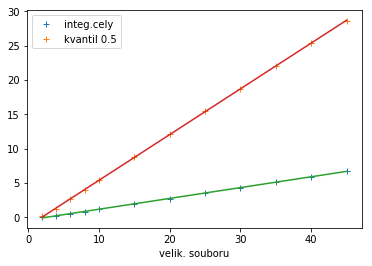

In [7]:
from matplotlib import pyplot as pl
%matplotlib inline
import numpy as np
from scipy import integrate as ig
Ns=list(range(2,10,2))+list(range(10,50,5))
norms=[ig.quad(lambda x:tefun(x,0.5,n),-0.99,0.99)[0] for n in Ns]#gaussova kvadratura
ints05=[ig.quad(lambda x:tefun(x,0.5,n),-0.99,0.5)[0] for n in Ns]
#zavislost na N sqrt(aN+b)/sqrt(a_2 N+b_2)
pl.plot(Ns,1/np.r_[norms]**2,'+')
zz1=np.polyfit(Ns,1/np.r_[norms]**2,1)
pl.plot(Ns,1/np.r_[ints05]**2,'+')
pl.plot(Ns,np.polyval(zz1,Ns))
zz05=np.polyfit(Ns,1/np.r_[ints05]**2,1)
pl.plot(Ns,np.polyval(zz05,Ns))
pl.xlabel("velik. souboru")
pl.legend(["integ.cely","kvantil 0.5"])

array([ 0.43121001,  0.26442757,  0.21709263,  0.18458887,  0.15844065,
        0.11076818,  0.07919624,  0.05744818,  0.04209682,  0.03108073,
        0.02308156,  0.01722121])

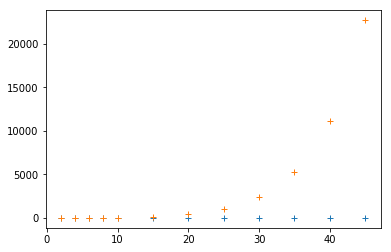

In [20]:
normsb=[ig.quad(lambda x:tefun(x,0.7,n),-0.99,0.99)[0] for n in Ns]#gaussova kvadratura
ints05b=[ig.quad(lambda x:tefun(x,0.7,n),-0.99,0.5)[0] for n in Ns]
pl.plot(Ns,1/np.r_[normsb]**2,'+')
zz1b=np.polyfit(Ns,1/np.r_[normsb]**2,1)
pl.plot(Ns,1/np.r_[ints05b]**2,'+')
np.array(ints05b)/np.array(normsb)

In [19]:
np.array(ints05)/np.array(norms)

array([ 0.49238729,  0.43973428,  0.45102028,  0.45945963,  0.46479238,
        0.47233256,  0.47647905,  0.47919075,  0.48114018,  0.48262816,
        0.48381192,  0.48478272])

In [17]:
np.sqrt(np.polyval(zz1[1:],Ns)/np.polyval(zz05[1:],Ns))

array([ 0.54827236,  0.54827236,  0.54827236,  0.54827236,  0.54827236,
        0.54827236,  0.54827236,  0.54827236,  0.54827236,  0.54827236,
        0.54827236,  0.54827236])

In [1]:
rsmul=np.r_[0:0.99:0.05]
intsmul=np.r_[[ig.quad(lambda x:tefun(x,0.5,10),-0.99,r)[0] for r in rsmul],norms[4]] #integral po r1

pl.plot(rsmul+0.025,intsmul[1:]-intsmul[:-1],'x')
pol1=np.polyfit(rsmul+0.025,intsmul[1:]-intsmul[:-1],6)
pl.plot(rsmul,np.polyval(pol1,rsmul))
pl.xlabel("horni mez kvantilu")
#pl.plot(rsmul+0.025,intsmul[1:]-intsmul[:-1],'+')
pl.title("hustota prsti pro N=10,rho=0.5")

NameError: name 'np' is not defined

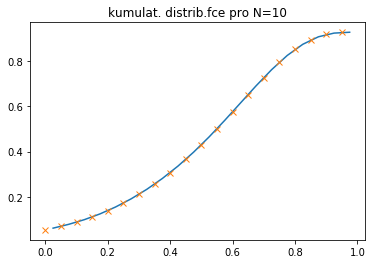

In [10]:
pl.plot(rsmul+0.025,np.polyval(np.polyint(pol1),rsmul+0.025)/0.05+intsmul[0])
pl.plot(rsmul,intsmul[:-1],'x')
levs=[0.8,0.9,0.95,0.98]
pl.title("kumulat. distrib.fce pro N=10")

In [34]:
levs=[0.01,0.05,0.1,0.9,0.95,0.99]
def polygon(rho=0.25,n=10,step=0.05,infit=False):
    #nafituje hustotu prsti polynomem 6.radu
    #spocte kumulativ. distrib. fci
    #najde polohu kvantilu
    rsmul=np.r_[0:1.001:step]
    intsmul=np.r_[[ig.quad(lambda x:tefun(x,rho,n),-0.99,r)[0] for r in rsmul]]
    rsmul=rsmul[:-1]
    pol1=np.polyfit(rsmul+step/2.,intsmul[1:]-intsmul[:-1],6)
    resid=np.polyval(pol1,rsmul+step/2.)-intsmul[1:]+intsmul[:-1]
    ipol1=np.polyint(pol1)/step #kumulativ. fce
    ipol1[-1]=intsmul[0]
    ipol1/=intsmul[-1]
    if infit:
        lop1=np.polyfit(np.polyval(ipol1,rsmul),rsmul,7)
        return np.polyval(lop1,levs)
    arot=[np.roots(np.polyadd(ipol1,[-l])) for l in levs] # kdy polynom ipol1 dosahne hodnoty l
    arot=[a[a.imag==0] for a in arot]
    brot=[]
    for a in arot:
        sel=(a.real>0)*(a.real<1)
        if sum(sel)==0:brot.append(0)
        else:brot.append(a[sel][0].real)
    #pos=[a[sel][0].real for a in arot]
    #if len(pos)<len(levs): pos+=[0]*(len(levs)-len(pos))
    return np.array(brot)#jen smysluplna reseni

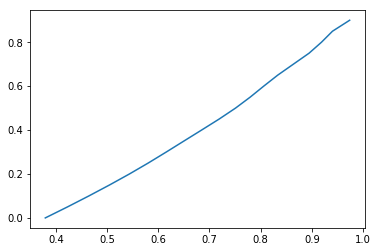

In [52]:
rlev=np.r_[0:0.95:0.05]
komplet=np.array([polygon(rho,20,infit=False) for rho in rlev])
pl.plot(komplet[:,4],rlev)

In [51]:
from scipy import interpolate as ip
fu1=ip.interp1d(komplet[:,4],zval)
from scipy import optimize as op
op.fsolve(lambda x:fu1(x)-0.5,0.2)

ValueError: x and y arrays must be equal in length along interpolation axis.

In [14]:
z1=polygon(n=10)
z2=polygon(n=20)
z2/z1

array([ 0.81747944,  0.81557469,  0.82099054])

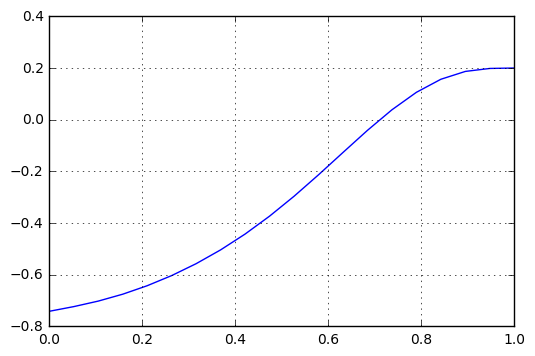

In [31]:
from scipy import optimize as op
step=0.05
ipol1=np.polyint(pol1)/step
ipol1[-1]=intsmul[0]
ipol1/=intsmul[-1]
zk=op.root(lambda x:np.polyval(np.polyadd(ipol1,[-levs[2]]),x),0.8)
#op.root?
zx=np.r_[:1:20j]
pl.plot(zx,np.polyval(np.polyadd(ipol1,[-0.8]),zx))
pl.grid()

In [40]:
alquant=np.array([polygon(rho,n=10) for rho in np.arange(0.05,1,0.05)])

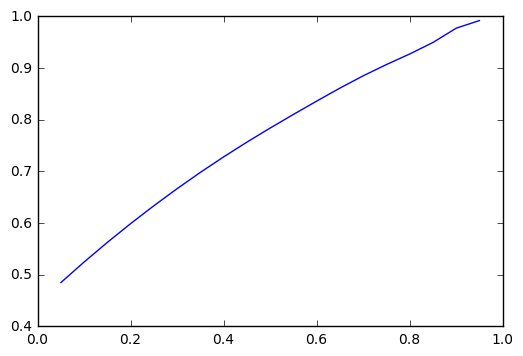

In [41]:
rhos=np.arange(0.05,1,0.05)
pl.plot(rhos,alquant[:,1])

array([ 0.7164207 ,  0.77270202,  0.83002147,  0.89754835])

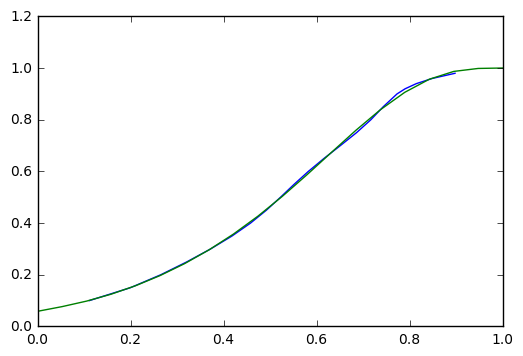

In [38]:
lop1=np.polyfit(np.polyval(ipol1,zx),zx,7)
iy=np.r_[0.1:.9:0.05,.9:.99:0.02]
pl.plot(np.polyval(lop1,iy),iy)
pl.plot(zx,np.polyval(np.polyadd(ipol1,[-0]),zx))
np.polyval(lop1,levs)

C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


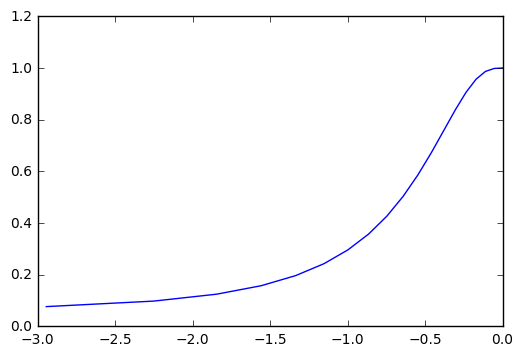

In [46]:
alquant[9]
pl.plot(np.log(zx),np.polyval(ipol1,zx))